<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning-project/blob/main/part_1/2_ML_Project_Politiecontroles_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

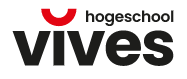<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# **Project Politiecontroles: Exploratory Data Analysis**




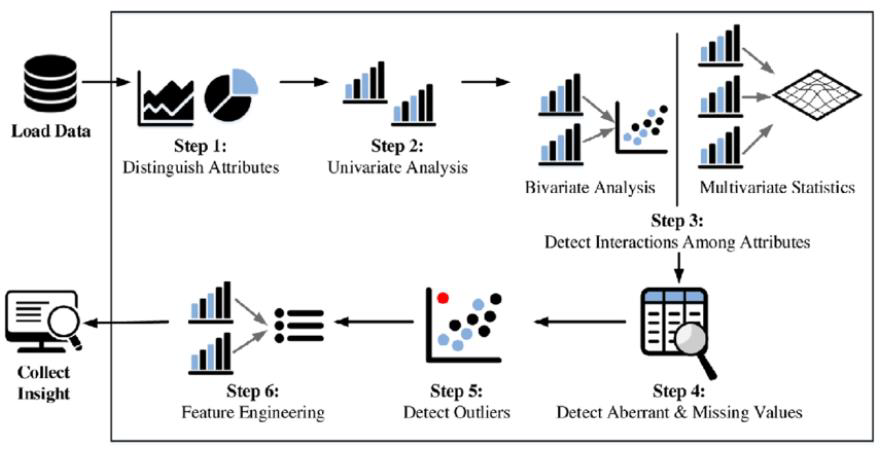

In dit project maken we dus gebruik van een dataset met politiedata die gekoppeld is aan weerdata. De datasets zijn ook terug te vinden op [Kaggle](https://www.kaggle.com/).

In de vorige fase hebben we de data klaargemaakt om er dan verder machine learning op toe te kunnen passen. In deze fase gaan we de data verder verkennen en de features extraheren. Deze fase noemen we de **exploratory data analysis**, kortweg EDA. In feite hebben we in de vorige notebook ook al een deel van de EDA uitgevoerd. Zo hebben we de attributen al verkend en univariate analyses uitgevoerd, en we hebben er zelfs al voor gezorgd dat er geen missing values of outliers meer in de dataset zitten.

We hebben echter nog geen bivariate of zelfs multivariate analyses uitgevoerd. Hiermee willen we een antwoord krijgen op de vraag of de variabelen of features in de dataset voldoende informatie bevatten om effectief bij te dragen aan nauwkeurige voorspellingen. In het ideale geval zijn de features onafhankelijk van elkaar, wat we kunnen testen door na te gaan in hoeverre die features al dan niet correleren. In deze notebook zullen we dus wat statistiek moeten toepassen!

## Univariate analyses

Eerst en vooral beginnen we met het inlezen van de opgekuiste dataset die we in de vorige notebook opgeslagen hebben als `'police_controls.csv'`. Gebruik de file die je terugvindt op de [GitHub Repo van deze opdracht](https://github.com/alouwyck/vives-machine-learning-project)!

Toon de eerste vijf records.

Met de methode `info()` krijgen we een overzicht van de kolommen, hoeveel non-null waarden elke kolom heeft en wat het datatype is van die waarden.

Met de methode `describe()` kunnen we al enkele samenvattende statistieken opvragen van de numerieke variabelen.

De vraag is nu of we al die variabelen effectief als numeriek gaan beschouwen. Zo zijn variabelen `'month'` en `'day'` in dit geval categorisch en dus gaan we `'year'` en `'hour'` ook als categorisch opvatten, ook al worden ze hier weergegeven door een numerieke waarde. De leeftijd van de bestuurder `'driver_age'` zou hier in principe ook als categorisch kunnen geïnterpreteerd worden.

De overige 4 numerieke variabelen die met temperatuur, wind en weer te maken hebben, zijn effectief kwantitatief. Maak voor elk van die variabelen (`'TMIN'`, `'TMAX'`, `'AWND'` en `'WSF2'`) een histogram. Doe dit aan de hand van 2x2 subplots!

Op het eerste gezicht zijn deze variabelen niet normaal verdeeld. Laten we dat eens testen met de [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test). De code voor deze test krijg je cadeau:

In [ ]:
from scipy.stats import shapiro

# Shapiro-Wilk test
def shapiro_wilk(variable, alpha=0.05):
    '''
    Perform Shapiro-Wilk test for normality
    - variable: the variable to test (array_like)
    - alpha: significance level (default 0.05)
    '''
    statistic, p_value = shapiro(variable)
    # Check the p-value
    if p_value > alpha:
        print("Data looks normally distributed (fail to reject H0)")
    else:
        print("Data does not look normally distributed (reject H0)")

Test nu of de meteorologische variabelen al dan niet normaal verdeeld zijn!

Laten we dan toch de leeftijd van de bestuurders ook als kwantitatief beschouwen. Is die variabele normaal verdeeld? Maak opnieuw een histogram en voer de test uit en je zal zien dat die duidelijk niet normaal verdeeld is!

Dit zijn voorbeelden van univariate analyses omdat we hier slechts één variabele bestuderen, vandaar ook het bijvoeglijke naamwoord UNI-variate...

Voor de categorische variabelen hebben dat al in de vorige notebook gedaan door de aantallen te bekijken. We kunnen dat natuurlijk ook visualiseren a.d.h.v. een staafdiagram of barplot. Doe dit voor variabelen `'year'`, `'month'`, `'day'` en `'hour'`. Creëer opnieuw 2x2 subplots.

We kunnen natuurlijk ook een taartdiagram of piechart gebruiken. Doe dit voor `'driver_gender'` en `'driver_race'`, waarbij je de relatieve frequenties weergeeft op de chart. Zet de twee diagrammen naast elkaar.

Doe nu hetzelfde voor alle variabelen die met de controle te maken hebben:

`['search_conducted', 'is_arrested', 'stop_duration', 'drugs_related_stop']`

Creëer 2x2 subplots.

Tenslotte hebben we nog de volgende variabelen waarvoor we opnieuw een staafdiagram maken:

`['violation', 'stop_outcome', 'weather']`

We zien dat iets meer dan 50% van de overtredingen te maken hebben met overdreven snelheid (`'Speeding'`). Dat is ook wat we gaan proberen te voorspellen: krijgt de bestuurder een snelheidsbekeuring of niet? Maak daarom een extra boolean kolom `'Speeding'` aan met de **target**: label `True` als het een snelheidsovertreding is en label `False` als dat niet zo is. Toon als voorbeeld de eerste rijen van de kolom `'violation` samen met de nieuwe kolom `'Speeding'`.

Als we `'Speeding'` als label gebruiken, is de dataset gebalanceerd?

In principe moeten we nu kolom `'violation'` weggooien, maar dat gaan we voorlopig nog niet doen, omdat we die variabele gaan gebruiken in de bivariate analyse.

## Bivariate analyses

Typisch voor de bivariate analyse is het bepalen van de correlatie tussen de variabelen. Het berekenen van de Pearson correlatiecoëfficient die we bij lineaire regressie hebben besproken, heeft enkel zin bij kwantitatieve variabelen. Stel daarom een correlatiematrix op voor de 5 numerieke variabelen:

`['driver_age', 'TMIN', 'TMAX', 'AWND', 'WSF2']`

Maak gebruik van de DataFrame methode `corr()`.

Je kan die matrix ook mooi visualiseren m.b.v. een `heatmap` uit de seaborn library.

Zoals verwacht is er geen correlatie tussen de leeftijd van de bestuurder en de meteorologische variabelen. Er is echter wel een hoge correlatie tussen de twee temperatuursvariabelen en de variabelen `'AWND'` en `'WSF2'`. Voor het trainen van een machine learning model willen we natuurlijk features die zoveel als mogelijk onafhankelijk zijn van elkaar, of anders gezegd, zo weinig mogelijk correleren!

Het heeft geen zin om een Pearson correlatiematrix op te stellen voor de categorische variabelen. Maar wat kunnen we dan wel doen? Wel, we kunnen bijvoorbeeld [Cramér's V](https://nl.wikipedia.org/wiki/Cram%C3%A9rs_V) toepassen, een associatiemaat tussen twee nominale variabelen. Net als de correlatiecoëfficiënt is Cramér's V eveneens een getal tussen 0 en 1, waarbij 0 aangeeft dat er geen associatie is, terwijl 1 een perfect verband weergeeft. Je kan Cramér's V berekenen a.d.h.v. de [Chikwadraattoest](https://nl.wikipedia.org/wiki/Chi-kwadraattoets). Dit is de code:

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(variable1, variable2):
    '''
    Calculate Cramér's V between two categorical variables
    - variable1: first categorical variable (array_like)
    - variable2: secondd categorical variable (array_like)
    '''
    # Contingency table
    contingency_table = pd.crosstab(variable1, variable2)
    # Chi-square test
    chi2, _, _, _ = chi2_contingency(contingency_table)
    # Number of observations
    n = contingency_table.sum().sum()
    # Cramér's V calculation
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    # Output
    return cramers_v

Schrijf nu zelf de code om een associatiematrix te berekenen voor een reeks van categorische variabelen. Gebruik een functie die gelijkaardig is aan DataFrame methode `corr` voor het opstellen van de correlatiematrix. Hoe er rekening mee dat de associatie tussen een variabele en zichzelf gelijk is aan 1, en dat de volgorde van de twee variabelen waartussen de associatie wordt berekend geen rol speelt.

In [ ]:
import numpy as np

def assoc(df):
    '''
    Calculate Cramér's V association matrix
    - df is a DataFrame with the categorical variables
    - returns a DataFrame with the association matrix
    '''
    pass  # schrijf hier je code

Pas je functie nu toe om de associatiematrix te berekenen voor de categorische variabelen van onze dataset. Dat zijn alle variabelen met uitzondering van de meteorologische variabelen. De target hoef je ook niet mee te nemen in de analyse, want die is afgeleid van variabele `'violation'`. Omdat de associatiematrix uitgebreid is, visualiseer je die best a.d.h.v. een heatmap.

We zien dat er een perfect verband is tussen variabelen `'stop_outcome'` en `'isarrested'`. Het is ook logisch dat die laatste kolom is afgeleid van de eerste, en dus mogen we `'isarrested'` uit de dataset verwijderen, want die geeft geen extra informatie.

Voor de rest zien we dat er heel weinig verband is tussen de overige features onderling. Op zich is dat zeer goed nieuws! Alleen hebben we de target `'Speeding'` afgeleid van kolom `'violation'`, en dus betekent dat ook dat het moeilijk kan worden om die variabele te voorspellen m.b.v. de features in onze dataset.

Omdat we de target hebben afgeleid van feature `'violation'`, verwijderen we nu best deze kolom uit onze dataset.

## Principal Component Analysis

De [principale-componentenanalyse](https://nl.wikipedia.org/wiki/Hoofdcomponentenanalyse), of kortweg **PCA**, is een vorm van *unsupervised learning* waarmee we aan *dimensionality reduction* kunnen doen. De dimensionaliteit is een moeilijk woord om het aantal variabelen of features aan te geven. Met PCA kunnen we dus het aantal features of kolommen in de dataset verminderen. Bekijk [dit YouTube filmje](https://youtu.be/rNpqlnlG_pM?si=O_uJYDlYqWNCMxRt) voor een goeie uitleg van wat PCA juist is en hoe het werkt.

Probleem is dat PCA enkel kan toegepast worden bij kwantitatieve variabelen. In onze dataset hebben we ook heel wat categorische variabelen die strikt genomen niet in aanmerking komen voor PCA. Bij dergelijke variabelen kunnen we wel de [multiple correspondence analysis](https://en.wikipedia.org/wiki/Multiple_correspondence_analysis) toepassen, of kortweg **MCA**. Maar in onze dataset hebben we zowel numerieke als categorische variabelen. We kunnen dit oplossen door de categorische variabelen om te zetten naar binaire variabelen d.m.v. [one-hot encoding](https://en.wikipedia.org/wiki/One-hot), waarna we PCA kunnen toepassen op alle variabelen.

In Scikit-Learn hebben we de `OneHotEncoder` klasse in module `preprocessing`. Probeer die klasse eens uit op variabele `'weather'` en toon de eerste 5 rijen van de binaire matrix die geretourneerd wordt.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X = enc.fit_transform(df[['weather']]).toarray()
pd.DataFrame(data=X, columns=enc.categories_).head()  # omzetten naar dataframe

Hetzelfde resultaat kunnen we bereiken met Pandas functie `get_dummies`. Het voordeel van deze functie is dat we een DataFrame als resultaat krijgen waardoor het direct duidelijk is waarvoor de verschillende kolommen staan. Test die functie uit en ken het geretourneerde DataFrame opnieuw toe aan variabele `X`!

Pas nu one-hot encoding toe gebruik makend van `get_dummies` bij alle categorische variabelen met meer dan 2 klassen:

`['year', 'month', 'day', 'hour', 'driver_race', 'stop_outcome', 'stop_duration']`

Zet eerst de numerieke waarden in kolommen `'year'` en `'hour'` om naar strings. Sla de resulterende binaire variabelen op in een nieuw Pandas DataFrame dat je toevoegt aan het DataFrame `X` dat je daarnet hebt gecreëerd. Gebruik hiervoor Pandas functie `concat`.

Voeg aan DataFrame `X` nu ook nog de categorische binaire variabelen toe:

`['driver_gender', 'search_conducted', 'drugs_related_stop']`

Zet die variabelen om naar `int` waarden.

Tenslotte voegen we nog de numerieke variabelen toe aan `X` nadat we ze hebben genormaliseerd. Aangezien uit de univariate analyse is gebleken dat geen van die variabelen normaal verdeeld is, gaan we geen standaardisatie toepassen adhv gemiddelde en standaardafwijking, maar we gaan eenvoudigweg herschalen obv minimum en maximum.

De `'driver_age'` kunnen we gewoon delen door 99, de maximum leeftijd.

Bij de meteorologische variabelen moeten we wel herschalen adhv maximum én minimum. We kunnen hiervoor de `MinMaxScaler` klasse van Scikit-Learn gebruiken. Maar we kunnen ook eenvoudig zelf de formule toepassen natuurlijk.

`(df[columns] - df[columns].min(axis=0)) / (df[columns].max(axis=0) - df[columns].min(axis=0))`

We hebben nu alle features getransformeerd en opgeslagen in DataFrame `X`. In de volgende fase zullen we gebruik maken van de Scikit-Learn klasse `ColumnTransformer` die al deze bewerkingen automatisch voor ons zal uitvoeren. Veel efficiënter dus!

Stop nu de target `'Speeding'` in een Pandas Series `y`. Zet om naar datatype `int`.

We passen nu PCA toe waarbij we de dataset gaan reduceren door enkel de componenten over te houden die 90% van de variantie verklaren.

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with n_components='mle' (maximum likelihood estimation)
pca = PCA(n_components='mle')

# Fit PCA on the data
pca.fit(X)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components that explain 90% of the variance
n_components = np.argmax(cumulative_explained_variance_ratio >= 0.90) + 1

# Re-fit PCA with the determined number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Print the number of components and the cumulative explained variance ratio
print("Number of components to explain 90% of variance:", n_components)
print("Cumulative explained variance ratio:", cumulative_explained_variance_ratio[n_components - 1])

Da's mooi! Bijna de helft van de kolommen valt dus weg!

Maakt dat nu een groot verschil uit op de uiteindelijke performantie van een machine learning model? In de volgende fase gaan we uitvoerig verschillende modellen toepassen, valideren, evalueren en vergelijken, maar om het effect van PCA na te gaan, passen we hier al eens logistic regression toe op `X` en `y` enerzijds en op `X_pca` en `y` anderzijds. We berekenen telkens de accuracy score en vergelijken de scores van beide modellen. Krijgen we een groot verschil?

We zien dus dat het verschil minder is dan 1%! Anderzijds merken we ook dat onze nauwkeurigheid niet heel hoog is, maar het is wel al beter dan een random classifier. Hoeveel nauwkeurigheid behaalt een classifier die altijd het meest voorkomende label voorspelt?

Merk op dat er ook een klasse `DummyClassifier` bestaat in Scikit-Learn die hetzelfde resultaat geeft als je inputparameter `strategy` gelijkstelt aan `'most_frequent'`. Probeer dat maar eens uit!

In de volgende fase van het modelleren gaan we proberen om een veel performanter model te trainen!

---